In [ ]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow v2.
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [ ]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training Parameters
learning_rate = 0.001
training_steps = 200
batch_size = 64
display_step = 100

# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.
num_units = 150 # number of neurons for the LSTM layer.

In [ ]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
#x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, num_features])
x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, 28,28])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=122)

In [ ]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Use tf.data API to shuffle and batch data.
val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Create LSTM Model.
class LSTM(Model):
    # Set layers.
    def __init__(self):
        super(LSTM, self).__init__()
        # RNN (LSTM) hidden layer.
        self.lstm_layer = layers.LSTM(units=num_units)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        # LSTM layer.
        x = self.lstm_layer(x)
        # Output layer (num_classes).
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build LSTM model.
lstm_net = LSTM()

In [ ]:
# Create LSTM Model.
class RNN(Model):
    # Set layers.
    def __init__(self):
        super(RNN, self).__init__()
        # RNN (LSTM) hidden layer.
        self.lstm_layer = layers.RNN(units=num_units)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        # LSTM layer.
        x = self.lstm_layer(x)
        # Output layer (num_classes).
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build LSTM model.
lstm_net = LSTM()

In [ ]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Adam optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = lstm_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = lstm_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update weights following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [ ]:
import matplotlib.pyplot as plt

epoch:1,step: 100, loss: 0.537949, accuracy: 0.843750
epoch:1,step: 200, loss: 0.342276, accuracy: 0.875000
epoch:2,step: 100, loss: 0.190840, accuracy: 0.937500
epoch:2,step: 200, loss: 0.114324, accuracy: 0.984375
epoch:3,step: 100, loss: 0.142995, accuracy: 0.984375
epoch:3,step: 200, loss: 0.188583, accuracy: 0.937500
epoch:4,step: 100, loss: 0.071431, accuracy: 0.968750
epoch:4,step: 200, loss: 0.150931, accuracy: 0.953125
epoch:5,step: 100, loss: 0.116836, accuracy: 0.953125
epoch:5,step: 200, loss: 0.115417, accuracy: 0.968750
epoch:6,step: 100, loss: 0.064361, accuracy: 0.984375
epoch:6,step: 200, loss: 0.044649, accuracy: 0.968750
epoch:7,step: 100, loss: 0.051084, accuracy: 0.968750
epoch:7,step: 200, loss: 0.036834, accuracy: 1.000000
epoch:8,step: 100, loss: 0.034956, accuracy: 0.984375
epoch:8,step: 200, loss: 0.033563, accuracy: 1.000000
epoch:9,step: 100, loss: 0.026280, accuracy: 1.000000
epoch:9,step: 200, loss: 0.078851, accuracy: 0.984375
epoch:10,step: 100, loss: 0.

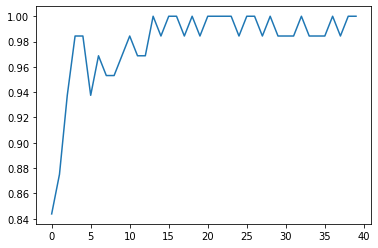

In [ ]:
dt=[]
lt=[]
for epoch in range(1,21):
  # Run training for the given number of steps.
  for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = lstm_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch:%g,step: %i, loss: %f, accuracy: %f" % (epoch,step, loss, acc))
        dt.append(acc)
        lt.append(loss)
plt.plot(dt)

Text(0.5, 1.0, 'train loss for batch_size=64 and hidden layer neurons= 128')

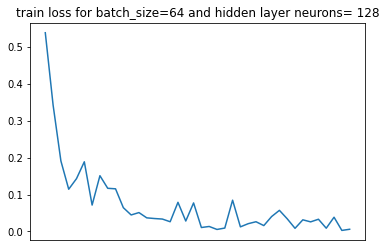

In [ ]:
plt.plot(lt)
plt.xticks([])
plt.title('train loss for batch_size=64 and hidden layer neurons= 128')

Text(0.5, 1.0, 'train accuracy for batch_size=64 and hidden layer neurons= 128')

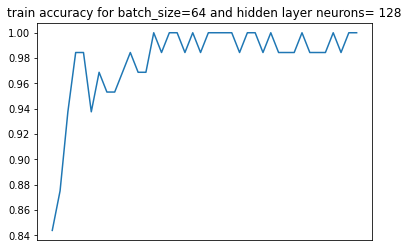

In [ ]:
plt.plot(dt)
plt.xticks([])
plt.title('train accuracy for batch_size=64 and hidden layer neurons= 128')

In [ ]:
pred = lstm_net(x_test, is_training=False)
loss = cross_entropy_loss(pred, y_test)
acc = accuracy(pred, y_test)
print("on lstm- loss: %f, accuracy: %f" % (loss, acc))

on lstm- loss: 1.493665, accuracy: 0.973400


Text(0.5, 1.0, 'val loss for batch_size=64 and hidden layer neurons= 128')

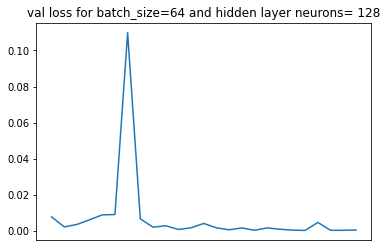

In [ ]:
plt.plot(l)
plt.xticks([])
plt.title('val loss for batch_size=64 and hidden layer neurons= 128')

Text(0.5, 1.0, 'val accuracy for batch_size=64 and hidden layer neurons= 128')

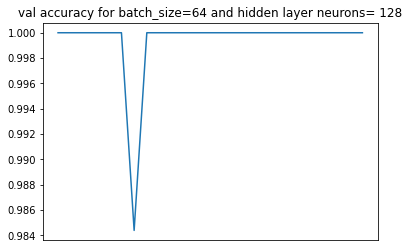

In [ ]:
plt.plot(d)
plt.xticks([])
plt.title('val accuracy for batch_size=64 and hidden layer neurons= 128')

In [ ]:
# Create LSTM Model.
class BiRNN(Model):
    # Set layers.
    def __init__(self):
        super(BiRNN, self).__init__()
        # Define 2 LSTM layers for forward and backward sequences.
        lstm_fw = layers.LSTM(units=num_units)
        lstm_bw = layers.LSTM(units=num_units, go_backwards=True)
        # BiRNN layer.
        self.bi_lstm = layers.Bidirectional(lstm_fw, backward_layer=lstm_bw)
        # Output layer (num_classes).
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.bi_lstm(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build LSTM model.
birnn_net = BiRNN()

In [ ]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = birnn_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = birnn_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

epoch:1,step: 100, loss: 0.044581, accuracy: 0.984375
epoch:1,step: 200, loss: 0.078288, accuracy: 0.968750
epoch:2,step: 100, loss: 0.051745, accuracy: 0.968750
epoch:2,step: 200, loss: 0.164617, accuracy: 0.953125
epoch:3,step: 100, loss: 0.062956, accuracy: 0.984375
epoch:3,step: 200, loss: 0.006380, accuracy: 1.000000
epoch:4,step: 100, loss: 0.013271, accuracy: 1.000000
epoch:4,step: 200, loss: 0.008071, accuracy: 1.000000
epoch:5,step: 100, loss: 0.012500, accuracy: 1.000000
epoch:5,step: 200, loss: 0.043283, accuracy: 0.984375
epoch:6,step: 100, loss: 0.002214, accuracy: 1.000000
epoch:6,step: 200, loss: 0.026344, accuracy: 1.000000
epoch:7,step: 100, loss: 0.028158, accuracy: 0.984375
epoch:7,step: 200, loss: 0.042923, accuracy: 0.984375
epoch:8,step: 100, loss: 0.006326, accuracy: 1.000000
epoch:8,step: 200, loss: 0.012694, accuracy: 1.000000
epoch:9,step: 100, loss: 0.003763, accuracy: 1.000000
epoch:9,step: 200, loss: 0.027529, accuracy: 1.000000
epoch:10,step: 100, loss: 0.

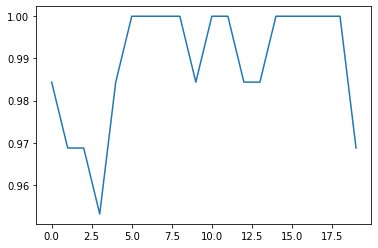

In [ ]:
bi_acct=[]
bi_losst=[]
for epoch in range(1,11):
  # Run training for the given number of steps.
  for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = birnn_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch:%g,step: %i, loss: %f, accuracy: %f" % (epoch,step, loss, acc))
        bi_acct.append(acc)
        bi_losst.append(loss)
plt.plot(bi_acct)

Text(0.5, 1.0, 'train accuracy for batch_size=64 and hidden layer neurons= 150')

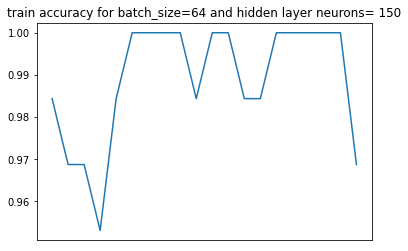

In [ ]:
plt.plot(bi_acct)
plt.xticks([])
plt.title('train accuracy for batch_size=64 and hidden layer neurons= 150')

Text(0.5, 1.0, 'train loss for batch_size=64 and hidden layer neurons= 150')

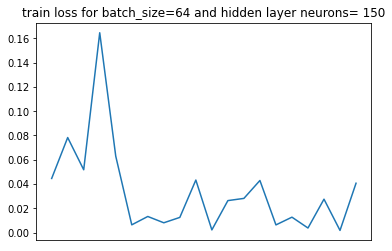

In [ ]:
plt.plot(bi_losst)
plt.xticks([])
plt.title('train loss for batch_size=64 and hidden layer neurons= 150')

Text(0.5, 1.0, 'val accuracy for batch_size=64 and hidden layer neurons= 150')

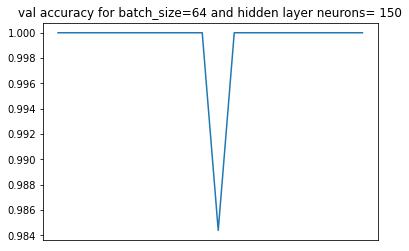

In [ ]:
plt.plot(bi_acc)
plt.xticks([])
plt.title('val accuracy for batch_size=64 and hidden layer neurons= 150')

Text(0.5, 1.0, 'val loss for batch_size=64 and hidden layer neurons= 150')

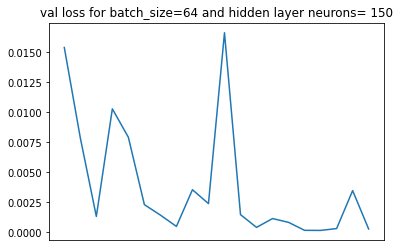

In [ ]:
plt.plot(bi_loss)
plt.xticks([])
plt.title('val loss for batch_size=64 and hidden layer neurons= 150')

In [ ]:
pred = birnn_net(x_test, is_training=False)
loss = cross_entropy_loss(pred, y_test)
acc = accuracy(pred, y_test)
print("on birnn- loss: %f, accuracy: %f" % (loss, acc))

on birnn- loss: 1.481341, accuracy: 0.982800


experiments

In [ ]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training Parameters
learning_rate = 0.0001
training_steps = 200
batch_size = 100
display_step = 100

# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.
num_units = 128 # number of neurons for the LSTM layer.